### 실시간 비명 감지 시스템

#### waveforms 리스트의 숫자는 오디오 신호의 샘플 값을 나타냄
이 숫자들은 시간 축에서 오디오 신호의 진폭(Amplitude)을 표현하며,  
아날로그 오디오 신호를 디지털화한 결과임

디지털 오디오 샘플의 의미:
1. 진폭(Amplitude):
- 숫자는 아날로그 오디오 신호의 진폭(소리의 세기)을 나타냄.
- 이 값들은 특정 시간 간격(샘플링 레이트)에서 측정된 신호의 크기를 디지털로 표현.

2. 범위:
- 일반적으로 부동소수점 또는 정수형 데이터로 표현됩니다.

3. 부동소수점(float):
- 값의 범위는 -1.0 ~ 1.0입니다.
- 대부분의 오디오 처리 라이브러리는 이 형식을 사용.

4. 정수형(int):
- 16비트 오디오: 범위는 -32,768 ~ 32,767.
- 24비트 오디오: 더 넓은 정수 범위.

5. 시간 축:
- 각 숫자는 일정 시간 간격의 진폭을 나타냄.
- 샘플링 레이트(예: 16,000 Hz)는 1초 동안 몇 개의 샘플이 기록되었는지를 나타냄.
- 예: 16,000 Hz 오디오에서 waveforms의 길이가 16,000이면, 이 데이터는 1초 길이의 오디오.

#### waveforms에서 각 값의 해석:
- waveforms 리스트는 각 오디오 파일을 텐서로 표현한 것. 
- 각 텐서의 형태는 (채널 수, 샘플 수)이며:

1) 채널 수: 오디오의 모노/스테레오 여부(1 또는 2).
2) 샘플 수: 오디오의 길이에 해당하는 샘플 값의 개수.

In [ ]:
import torch
import torchaudio
from torchaudio.transforms import Resample

file_path = "data/normal1.wav"  
target_sample_rate = 16000 

try:
    waveform, sample_rate = torchaudio.load(file_path)

    print("=== Before Resample ===")
    print(f"Loaded audio shape: {waveform.shape}")
    print(f"Sample rate: {sample_rate}\n")

    print("=== After Resample ===")
    resample = Resample(orig_freq=sample_rate, new_freq=target_sample_rate)
    waveform = resample(waveform)
    sample_rate = target_sample_rate
    print(f"Loaded audio shape: {waveform.shape}")
    print(f"Sample rate: {sample_rate}")
    
except Exception as e:
    print(f"Error loading audio file: {e}")

=== Before Resample ===
Loaded audio shape: torch.Size([1, 30546])
Sample rate: 22000

=== After Resample ===
Loaded audio shape: torch.Size([1, 22216])
Sample rate: 16000


In [2]:
import torch
import torchaudio
from torchaudio.transforms import Resample

file_paths = ["data/a.mp3","data/b.mp3"]
target_sample_rate = 16000  
# 16,000 샘플/초(16 kHz 샘플링 레이트)는 1초 동안 오디오 신호를 16,000번 기록한 것
target_length = 16000 * 5  # Target length in samples (e.g., 5 seconds for 16 kHz)

def pad_waveform(waveform, target_length):
    # Pads or truncates the waveform to match the target length
    current_length = waveform.size(1)
    if current_length < target_length:
        padding = target_length - current_length
        waveform = torch.nn.functional.pad(waveform, (0, padding))
    elif current_length > target_length:
        waveform = waveform[:, :target_length]
    return waveform

try:
    waveforms = []
    # Load and preprocess all audio files
    for file_path in file_paths:
        waveform, sample_rate = torchaudio.load(file_path)
        print('shape:',waveform.shape, 'sample_rate', sample_rate)
        # Min, Max 값 출력
        print(f"Min: {waveform.min()}, Max: {waveform.max()}")

        resample = Resample(orig_freq=sample_rate, new_freq=target_sample_rate)
        waveform = resample(waveform)
        sample_rate = target_sample_rate
        
        waveform = pad_waveform(waveform, target_length)
        waveforms.append(waveform)

    # Stack waveforms into a single tensor for training
    dataset = torch.stack(waveforms)

    print(f"Dataset shape: {dataset.shape}")  # Shape: (num_files, num_channels, target_length)
except Exception as e:
    print(f"Error processing audio files: {e}")

shape: torch.Size([2, 153216]) sample_rate 48000
Min: -0.9577507972717285, Max: 0.9284815788269043
shape: torch.Size([2, 72576]) sample_rate 44100
Min: -1.0482803583145142, Max: 1.0358246564865112
Dataset shape: torch.Size([2, 2, 80000])


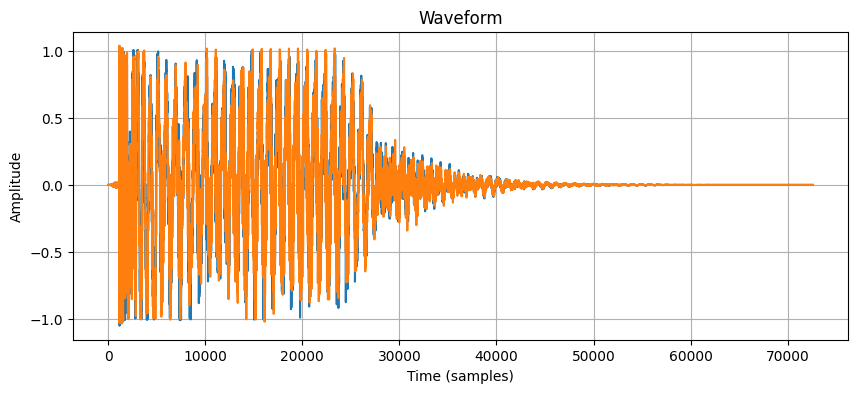

In [3]:
import torch
import torchaudio
import matplotlib.pyplot as plt

# Load the audio file
file_path = "data/b.mp3"
waveform, sample_rate = torchaudio.load(file_path)

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(waveform.t().numpy())  # Transpose to make it (samples,) for plotting
plt.title("Waveform")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [4]:
waveform.t().shape

torch.Size([72576, 2])

In [5]:
waveform.t()

tensor([[ 0.0000e+00,  0.0000e+00],
        [-1.4079e-09, -9.6878e-10],
        [ 1.6303e-09,  1.7325e-09],
        ...,
        [ 9.7227e-11, -7.4177e-11],
        [-4.2262e-11,  2.3430e-11],
        [-8.6726e-11,  8.4210e-11]])

In [6]:
file_paths = ["data/scream1.wav", "data/normal1.wav"]

In [7]:
import torch

# 3개의 (1, 1000) 텐서를 리스트에 저장
waveforms = [
    torch.ones(1, 1000),
    torch.zeros(1, 1000),
    torch.full((1, 1000), 0.5)
]

# 스택하여 하나의 텐서로 결합
dataset = torch.stack(waveforms)

print(dataset.shape)  # (3, 1, 1000)

torch.Size([3, 1, 1000])


### 모델 학습

In [8]:
x.shape

NameError: name 'x' is not defined

In [ ]:
import torch
import torchaudio
from torchaudio.transforms import Resample
from torch.nn import Sequential, Flatten, Linear
from torch.optim import Adam
from sklearn.metrics import accuracy_score
import numpy as np

# Parameters
file_paths = ["data/a.mp3", "data/b.mp3"]  # Replace with actual paths
labels = [0, 1]  # Corresponding labels for classification
target_sample_rate = 16000
target_length = 16000 * 5  # 5 seconds (80,000 samples)

# Function to preprocess waveforms
def pad_waveform(waveform, target_length):
    current_length = waveform.size(1)
    if current_length < target_length:
        padding = target_length - current_length
        waveform = torch.nn.functional.pad(waveform, (0, padding))
    elif current_length > target_length:
        waveform = waveform[:, :target_length]
    return waveform

# Step 1: Convert MP3 to numerical tensor
waveforms = []
try:
    for file_path in file_paths:
        waveform, sample_rate = torchaudio.load(file_path)
        print('Original shape:', waveform.shape, 'Sample rate:', sample_rate)
        print(f"Min: {waveform.min()}, Max: {waveform.max()}")

        resample = Resample(orig_freq=sample_rate, new_freq=target_sample_rate)
        waveform = resample(waveform)

        waveform = pad_waveform(waveform, target_length)
        waveforms.append(waveform.view(-1))  # Flatten waveform into 1D vector

    # Combine waveforms into dataset
    x = torch.stack(waveforms)
    y = torch.tensor(labels, dtype=torch.long)

    print(f"Dataset shape: {x.shape}, Labels shape: {y.shape}")
except Exception as e:
    print(f"Error processing audio files: {e}")



# Step 2: Define a simple PyTorch model
input_size = target_length  # Flattened input size
num_classes = 2  # Binary classification

model = Sequential(
    Linear(160000, 32),  # Fully connected layer
    torch.nn.ReLU(),  # Activation function
    Linear(32, num_classes),  # Output layer
    torch.nn.Softmax(dim=1)  # Softmax for probabilities
)

# Define loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.01)

# Step 3: Training loop
for step in range(100):  # Number of epochs
    optimizer.zero_grad()
    hx = model(x)  # Forward pass
    cost = loss_fn(hx, y)  # Compute loss
    cost.backward()  # Backward pass
    optimizer.step()  # Update weights

    # Calculate accuracy
    with torch.no_grad():
        _, pred = hx.max(dim=1)
        acc = accuracy_score(y.numpy(), pred.numpy())
    print(f"Step {step}, Cost: {cost.item():.4f}, Accuracy: {acc:.2%}")

Original shape: torch.Size([2, 153216]) Sample rate: 48000
Min: -0.9577507972717285, Max: 0.9284815788269043
Original shape: torch.Size([2, 72576]) Sample rate: 44100
Min: -1.0482803583145142, Max: 1.0358246564865112
Dataset shape: torch.Size([2, 160000]), Labels shape: torch.Size([2])
Step 0, Cost: 0.6998, Accuracy: 50.00%
Step 1, Cost: 0.3133, Accuracy: 100.00%
Step 2, Cost: 0.3133, Accuracy: 100.00%
Step 3, Cost: 0.3133, Accuracy: 100.00%
Step 4, Cost: 0.3133, Accuracy: 100.00%
Step 5, Cost: 0.3133, Accuracy: 100.00%
Step 6, Cost: 0.3133, Accuracy: 100.00%
Step 7, Cost: 0.3133, Accuracy: 100.00%
Step 8, Cost: 0.3133, Accuracy: 100.00%
Step 9, Cost: 0.3133, Accuracy: 100.00%
Step 10, Cost: 0.3133, Accuracy: 100.00%
Step 11, Cost: 0.3133, Accuracy: 100.00%
Step 12, Cost: 0.3133, Accuracy: 100.00%
Step 13, Cost: 0.3133, Accuracy: 100.00%
Step 14, Cost: 0.3133, Accuracy: 100.00%
Step 15, Cost: 0.3133, Accuracy: 100.00%
Step 16, Cost: 0.3133, Accuracy: 100.00%
Step 17, Cost: 0.3133, Accu

In [ ]:
# Function to preprocess a single audio file for prediction
def preprocess_audio(file_path, target_sample_rate, target_length):
    waveform, sample_rate = torchaudio.load(file_path)
    print('Original shape:', waveform.shape, 'Sample rate:', sample_rate)

    # Resample if necessary
    if sample_rate != target_sample_rate:
        resample = Resample(orig_freq=sample_rate, new_freq=target_sample_rate)
        waveform = resample(waveform)

    # Pad or truncate to target length
    current_length = waveform.size(1)
    if current_length < target_length:
        padding = target_length - current_length
        waveform = torch.nn.functional.pad(waveform, (0, padding))
    elif current_length > target_length:
        waveform = waveform[:, :target_length]

    print(f"Processed shape: {waveform.shape}")
    return waveform.view(-1)  # Flatten to 1D

# Function to predict the class of a single audio file
def predict(model, file_path, target_sample_rate, target_length):
    # Preprocess the input audio
    input_audio = preprocess_audio(file_path, target_sample_rate, target_length)
    input_audio = input_audio.unsqueeze(0)  # Add batch dimension

    # Perform prediction
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        prediction = model(input_audio)
        predicted_class = torch.argmax(prediction, dim=1).item()
        probabilities = prediction.numpy()
        print(f"Predicted class: {predicted_class}")
        print(f"Probabilities: {probabilities}")
        return predicted_class

# Example usage
test_file = "data/b.mp3"  # Replace with your test audio file path
predicted_class = predict(model, test_file, target_sample_rate, target_length)
print(f"The predicted class for the audio file is: {predicted_class}")


Original shape: torch.Size([2, 72576]) Sample rate: 44100
Processed shape: torch.Size([2, 80000])
Predicted class: 1
Probabilities: [[0. 1.]]
The predicted class for the audio file is: 1
